**SA463A &#x25aa; Data Wrangling and Visualization &#x25aa; Fall 2021 &#x25aa; Uhan**

# Lesson 10. Data Sources in Altair

## In this lesson...

- This lesson is a brief interlude of sorts


- So far in this course, we have always specified data for a Chart object as a Pandas DataFrame


- This works well, but there are caveats we need to be aware of, especially as we work with larger datasets


- We'll also learn about another useful way to specify data in Altair

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Working with datasets with large numbers of rows

- We'll begin with an example


- Let's start by importing Pandas and Altair:

In [1]:
import pandas as pd
import altair as alt

- In the same folder as this notebook, there is a CSV file `data/sp500-2008-only.csv`, containing S&P 500 index values for every trading day in the year 2008, retrieved from Yahoo Finance [(link to secondary source)](https://github.com/vega/vega-datasets)


- Let's load the dataset and take a look:

In [2]:
sp500_2008_df = pd.read_csv('data/sp500-2008-only.csv')
sp500_2008_df.head()

,date,open,high,low,close,adjclose,volume
0,2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000
1,2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000
2,2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000
3,2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000
4,2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000


- For each `date`, we have:
    - the opening value of the S&P 500 (`open`),
    - the high value (`high`),
    - the low value (`low`),
    - the closing value (`close`),
    - the adjusted closing value (`adjclose`), and
    - the trading volume (`volume`)

❓ **Exercise 1.**
Create a line chart showing the closing value of the S&P 500 for each day in the year 2008. Layer your chart with an area chart showing the low and high values of the S&P 500. Make your chart interactive by enabling pan-and-zoom. You should end up with something that looks like this:

![](img/sp500_2008.svg)

In [3]:
# Solution
line = alt.Chart(sp500_2008_df).mark_line().encode(
    alt.X('date:T'),
    alt.Y('close:Q')
)

area = alt.Chart(sp500_2008_df).mark_area(
    opacity=0.2, color='red'
).encode(
    alt.X('date:T'),
    alt.Y('low:Q'),
    alt.Y2('high:Q')
)

(line + area).properties(
    width=600,
    height=300
).interactive()

alt.LayerChart(...)

- What if we want to look at a longer time horizon?


- There is another CSV file `data/sp500-2000.csv` in the same folder as this notebook that contains the same kind of data as `data/sp500-2008-only.csv`, except for the years 2000 to 2020


- Let's load this larger CSV file into a DataFrame and take a look: 

In [4]:
sp500_df = pd.read_csv('data/sp500-2000.csv')
sp500_df.head()

,date,open,high,low,close,adjclose,volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


- We can modify our code for Exercise 1 to create the same kind of chart, but now for years 2000 to 2020:

In [5]:
# Solution
line = alt.Chart(sp500_df).mark_line().encode(
    alt.X('date:T'),
    alt.Y('close:Q')
)

area = alt.Chart(sp500_df).mark_area(
    opacity=0.2, color='red'
).encode(
    alt.X('date:T'),
    alt.Y('low:Q'),
    alt.Y2('high:Q')
)

(line + area).properties(
    width=600,
    height=300
).interactive()

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.LayerChart(...)

- Wait, what happened? 🤨


- Looking carefully at the end of the error message, we see that we've run into the `MaxRowsError`:

    ```
    MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation
    ```



- What's going on here?


- When we give a Chart object a DataFrame, it embeds the _entire dataset_ within the Chart object
    - This can lead to very large charts (in terms of memory/storage) and in turn, very large notebooks


- Altair tries to prevent us from doing this...


- By default, if you try to create a Chart with a DataFrame that has more than 5000 rows, you will get an error

- We can circumvent the `MaxRowsError` by having Altair write the data to an external file


- To do this, we can enable Altair's **JSON data transformer**
    - [Here's the Altair documentation on data transformers](https://altair-viz.github.io/user_guide/data_transformers.html)


- First, to keep things tidy, let's create a new folder named `altair-data` in the same folder of this notebook
    - This will be where Altair writes the data for each chart in this notebook from now on


- Now, let's enable the JSON data transformer, telling Altair how to `prefix` each external data file:

In [6]:
# Solution
alt.data_transformers.enable('json', prefix='altair-data/')

DataTransformerRegistry.enable('json')

- To display Altair charts correctly in JupyterLab while using the JSON data transformer, we also need to enable Altair's `jupyterlab` renderer, like this: 

In [7]:
# Solution
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

- Now let's copy and paste our modified Exercise 1 code from above and see if we can get things working:

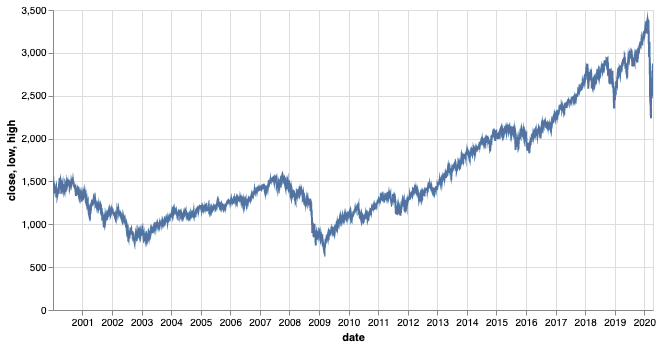

In [8]:
# Solution
line = alt.Chart(sp500_df).mark_line().encode(
    alt.X('date:T'),
    alt.Y('close:Q')
)

area = alt.Chart(sp500_df).mark_area(
    opacity=0.2, color='red'
).encode(
    alt.X('date:T'),
    alt.Y('low:Q'),
    alt.Y2('high:Q')
)

(line + area).properties(
    width=600,
    height=300
).interactive()

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## URL strings

- Instead of a Pandas DataFrame, we can give a Chart object a __URL string__ pointing to a CSV or JSON file


- Recall that a __uniform resource locator (URL)__ points to a resource by specifying its location on a computer network and a mechanism for retrieving it


- Giving Altair a URL instead of a DataFrame is another way to circumvent the `MaxRowsError`


- URLs can point to files on the web, or they can point to files locally on your machine


- Using *local* URLs with Altair can be tricky...


- However, using *web* URLs with Altair is easy, as long as your computer has access to the internet


- For example, the S&P 500 dataset we used above actually lives in the cloud here: 

        https://vega.github.io/vega-datasets/data/sp500-2000.csv


- We can pass this URL directly to a Chart object like this:

In [9]:
sp500_url = 'https://vega.github.io/vega-datasets/data/sp500-2000.csv'

In [ ]:
line = alt.Chart(...).mark_line().encode(
    alt.X('date:T'),
    alt.Y('close:Q')
)

area = alt.Chart(...).mark_area(
    opacity=0.2, color='red'
).encode(
    alt.X('date:T'),
    alt.Y('low:Q'),
    alt.Y2('high:Q')
)

(line + area).properties(
    width=600,
    height=300
).interactive()

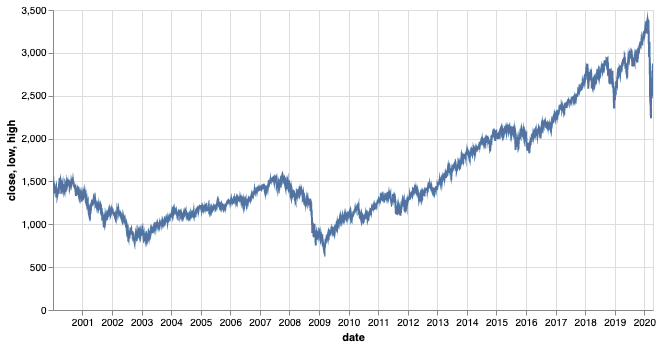

In [10]:
# Solution
line = alt.Chart(sp500_url).mark_line().encode(
    alt.X('date:T'),
    alt.Y('close:Q')
)

area = alt.Chart(sp500_url).mark_area(
    opacity=0.2, color='red'
).encode(
    alt.X('date:T'),
    alt.Y('low:Q'),
    alt.Y2('high:Q')
)

(line + area).properties(
    width=600,
    height=300
).interactive()

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## What's next?

- Our next lesson will be our last lesson exclusively on data visualization: how to create visualizations that involve *geographical* data


- We will be using what we learned in this lesson extensively: 
    - how to get Altair to work with large datasets 
    - how to get Altair to work with datasets on the web

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Notes and sources

- Altair documentation on
    - [Data transformers](https://altair-viz.github.io/user_guide/data_transformers.html)
    - [Displaying Altair charts (renderers)](https://altair-viz.github.io/user_guide/display_frontends.html#)
    - [Specifying data in Altair](https://altair-viz.github.io/user_guide/data.html)